In [64]:
import pandas as pd
import numpy as np

In [65]:
data = pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [66]:
# show missing values per column
print('Missing values per column:')
print(data.isnull().sum())

Missing values per column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [67]:
# check for duplicates
print('Number of duplicate rows:',data.duplicated().sum())
# Drop duplicate rows
data = data.drop_duplicates()

Number of duplicate rows: 0


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('retail_sales_dataset.csv')
# select only numeric columns
numeric_data = data.select_dtypes(include = 'number')
# Calculate IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
#Filter the outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
data_no_outliers = data[~outliers]
#show result
print('Original data shape:',data.shape)
print('Data shape after removing outliers:', data_no_outliers.shape)

Original data shape: (1000, 9)
Data shape after removing outliers: (1000, 9)


In [69]:
# Descriptive statistics for numeric columns
print("Descriptive Statistics:\n")
print(data.describe())

# Info on dataset structure
print("\nDataset Info:\n")
print(data.info())

Descriptive Statistics:

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              

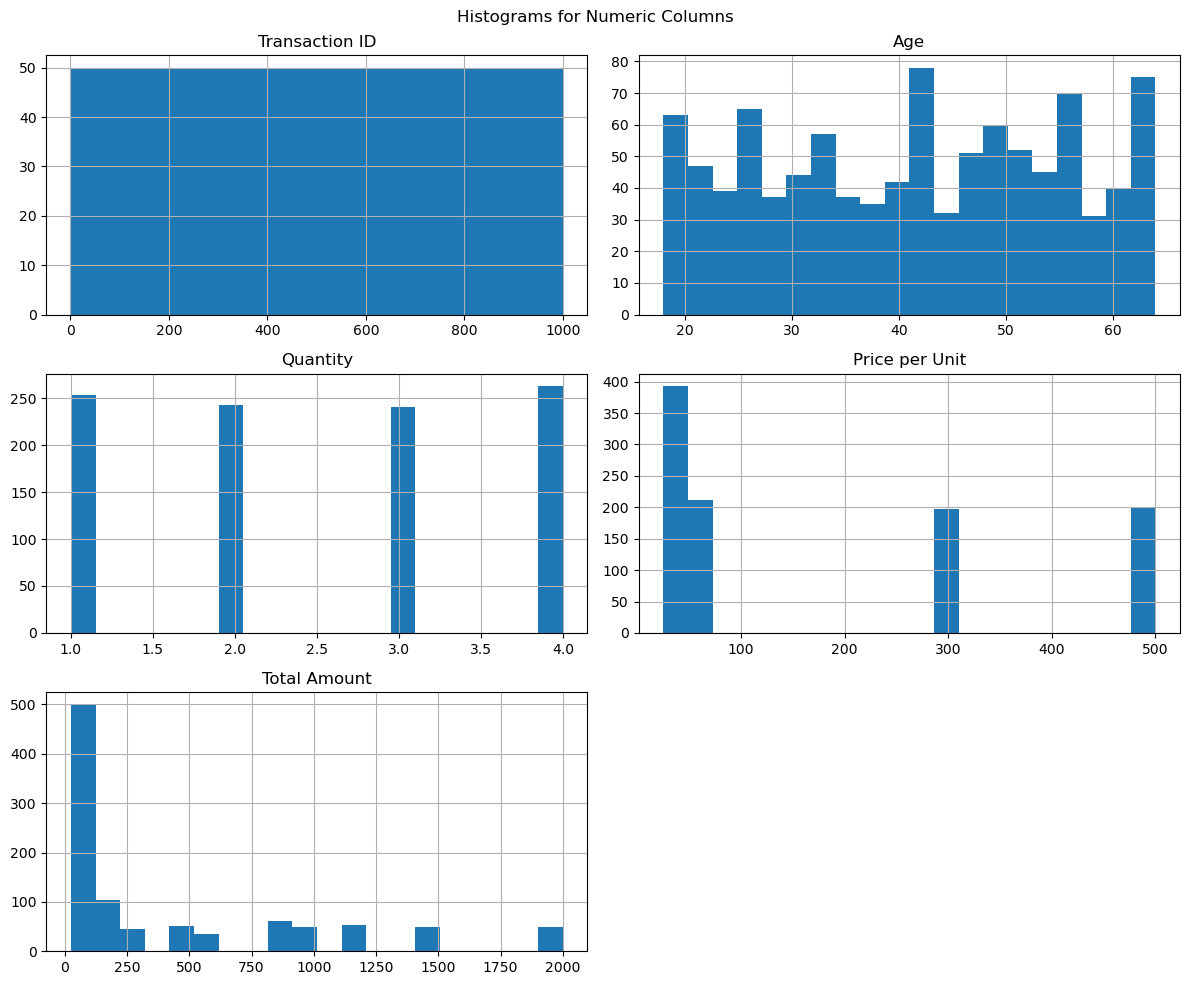

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numeric columns
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms for Numeric Columns")
plt.tight_layout()
plt.show()

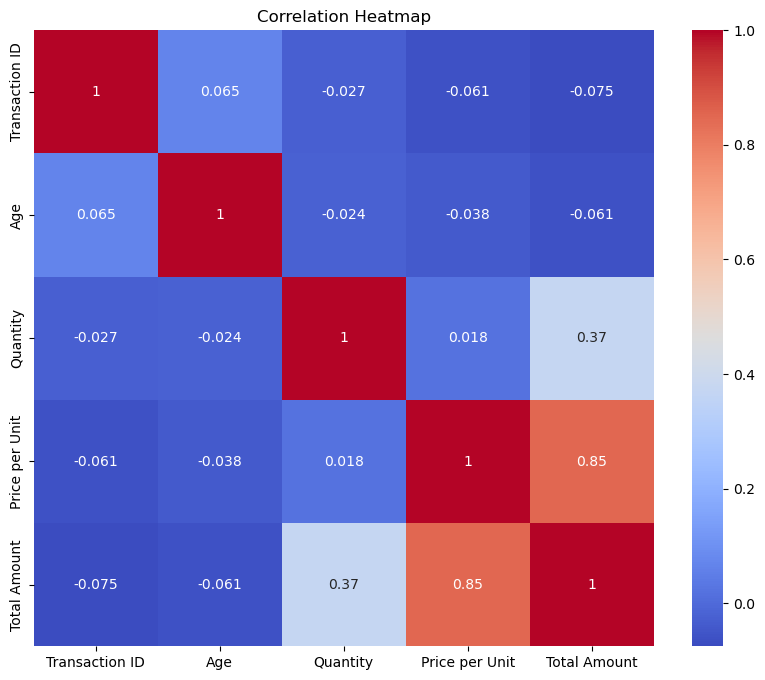

In [71]:
# Correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

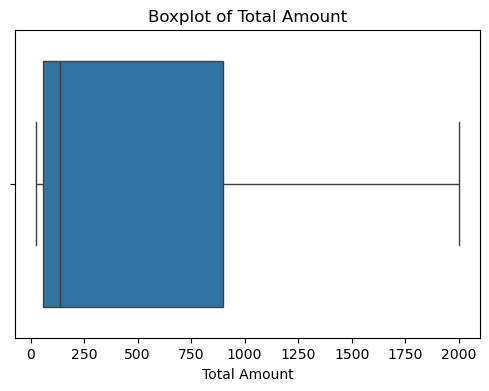

In [72]:
# Boxplot for 'Total Amount' column (change column name as needed)
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Total Amount'])
plt.title("Boxplot of Total Amount")
plt.show()

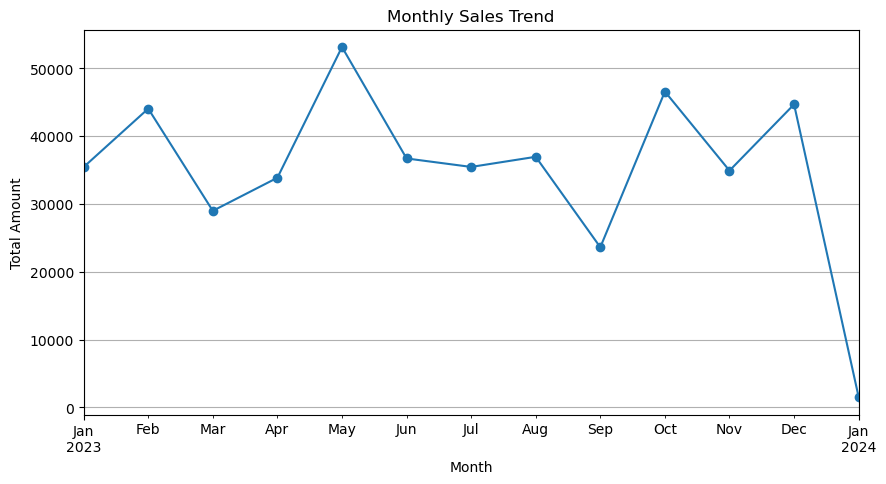

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data= pd.read_csv('retail_sales_dataset.csv')
# Convert date column to datetime (adjust column name if needed)
data['Date'] = pd.to_datetime(data['Date'])

# Group by month
monthly_sales = data.groupby(data['Date'].dt.to_period("M"))['Total Amount'].sum()

# Plot monthly sales trend
monthly_sales.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.grid(True)
plt.show()

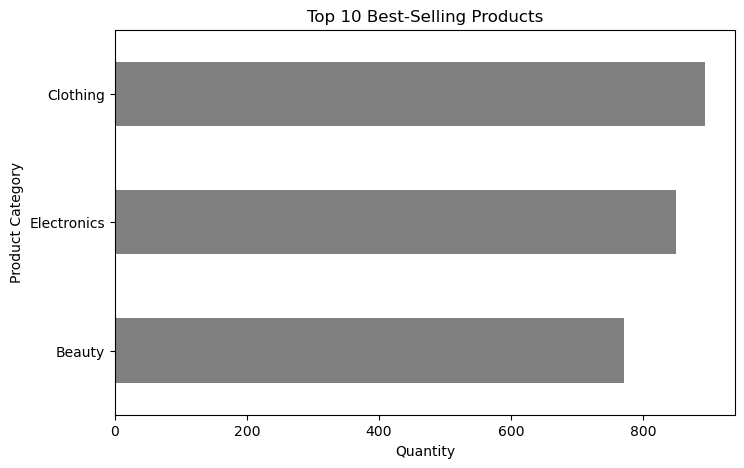

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('retail_sales_dataset.csv')
top_products = data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(8, 5), color='gray')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity")
plt.gca().invert_yaxis()
plt.show()

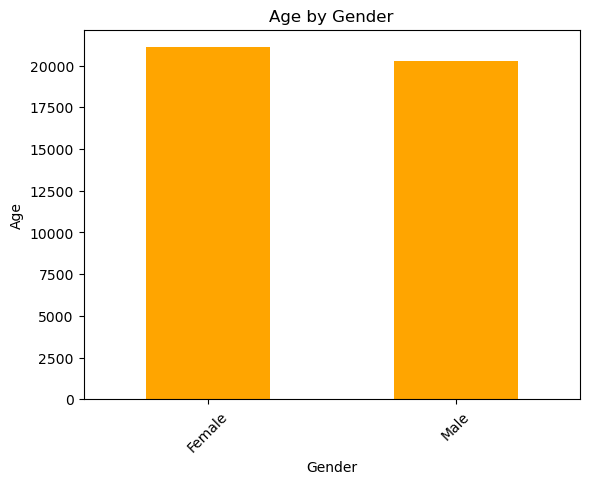

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('retail_sales_dataset.csv')
region_sales = data.groupby('Gender')['Age'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='orange')
plt.title("Age by Gender")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

Correlation Matrix:
                 Transaction ID       Age  Quantity  Price per Unit  \
Transaction ID        1.000000  0.065191 -0.026623       -0.060837   
Age                   0.065191  1.000000 -0.023737       -0.038423   
Quantity             -0.026623 -0.023737  1.000000        0.017501   
Price per Unit       -0.060837 -0.038423  0.017501        1.000000   
Total Amount         -0.075034 -0.060568  0.373707        0.851925   

                Total Amount  
Transaction ID     -0.075034  
Age                -0.060568  
Quantity            0.373707  
Price per Unit      0.851925  
Total Amount        1.000000  


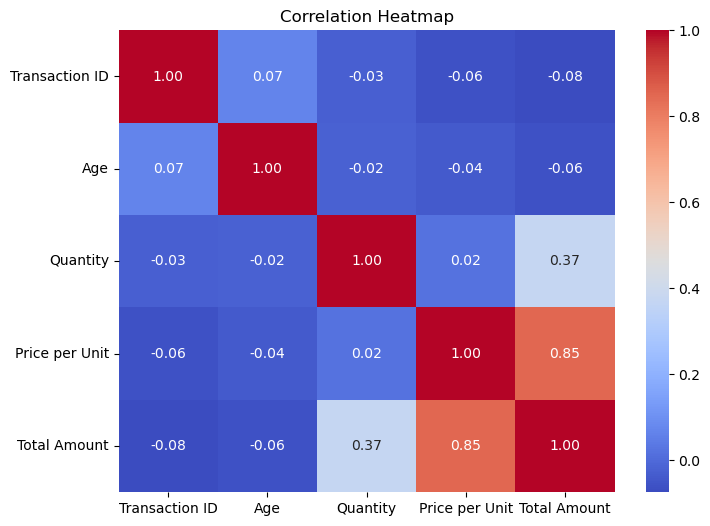

In [76]:
# Show numeric correlation
correlation = data.corr(numeric_only=True)
print("Correlation Matrix:\n", correlation)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Date'>

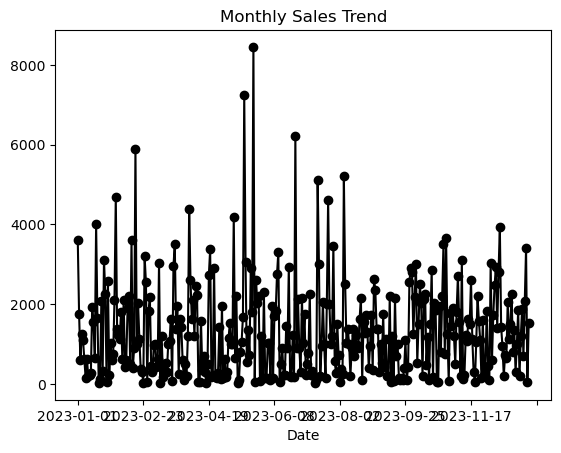

In [85]:
import pandas as pd 
import matplotlib.pyplot as plt
data= pd.read_csv('retail_sales_dataset.csv')
monthly_trend = data.groupby(data['Date'])['Total Amount'].sum()
monthly_trend.plot(kind='line', marker='o', color = 'black', title="Monthly Sales Trend")

<Axes: title={'center': 'Sales by Category'}, ylabel='Product Category'>

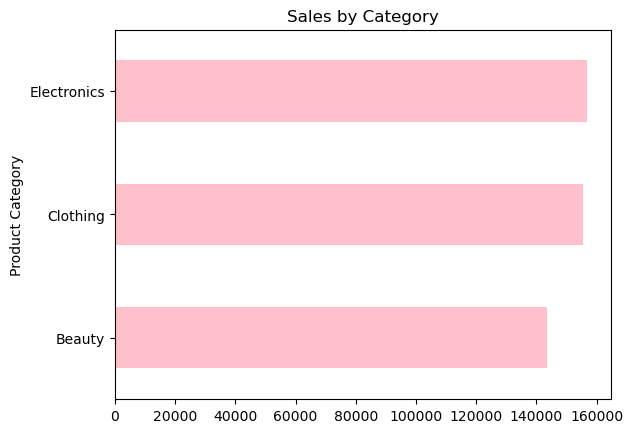

In [86]:
data.groupby('Product Category')['Total Amount'].sum().sort_values().plot(kind='barh', color= 'pink',title="Sales by Category")

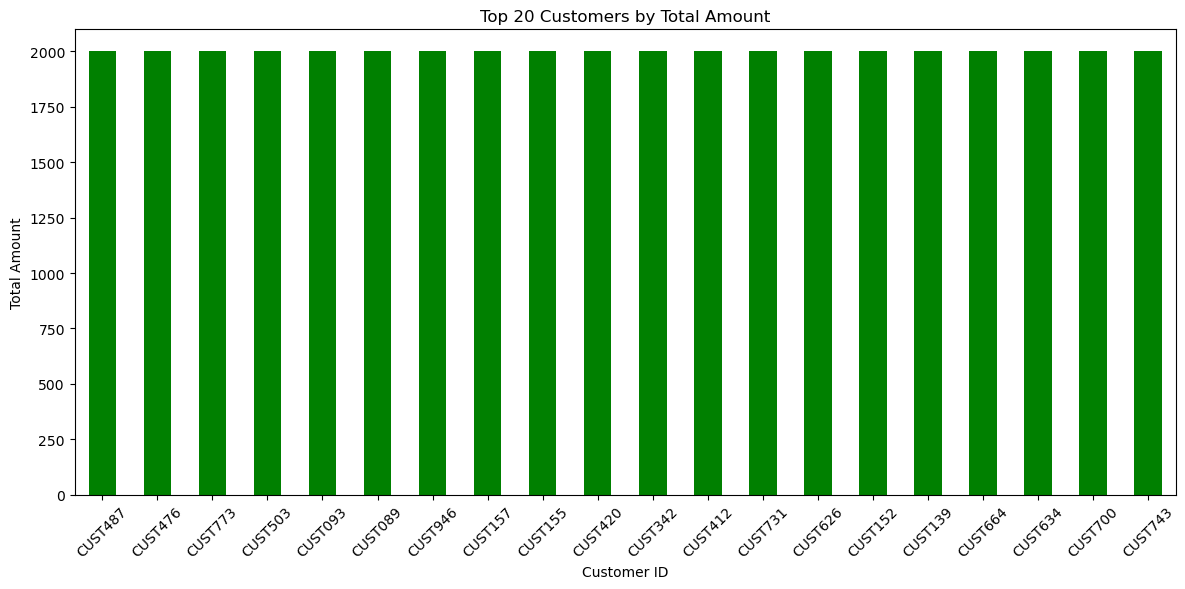

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Group Total Amount by Customer ID
customer_spend = data.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)

# Plot Total Amount vs Customer ID (Top 20 for visibility)
customer_spend.head(20).plot(kind='bar', figsize=(12, 6), color='green', title='Top 20 Customers by Total Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

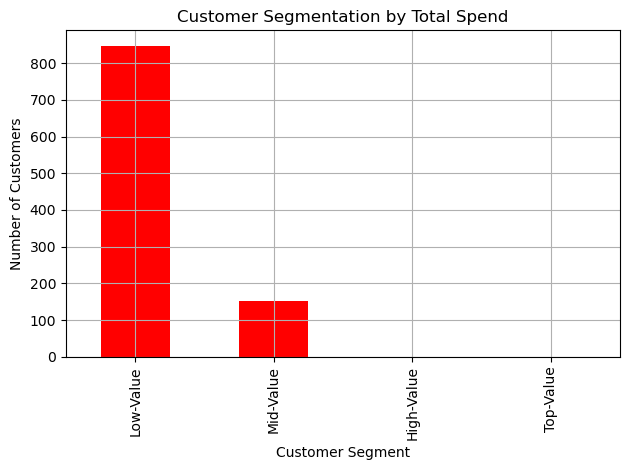

In [89]:
# Segment Customers Based on Spend
segments = pd.cut(customer_spend,
                  bins=[0, 1000, 5000, 10000, float('inf')],
                  labels=['Low-Value', 'Mid-Value', 'High-Value', 'Top-Value'])

# Count Customers in Each Segment
segment_counts = segments.value_counts().sort_index()

# Plot the Segments
segment_counts.plot(kind='bar', color='red', title='Customer Segmentation by Total Spend')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()